In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [5]:
X, y = make_classification(n_samples=400, 
                           n_features=20,
                           n_informative=4,
                           random_state=319) 

In [6]:
y.shape

(400,)

In [10]:
X.shape

(400, 20)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=456)

# Fitting a model

In [13]:
model = LogisticRegression()

In [14]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [18]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [19]:
roc_auc_score(y_test, model.predict(X_test))

0.7374999999999999

In [20]:
model.coef_

array([[-0.2057935 ,  0.54226485, -0.03090412, -0.01577295,  0.06877635,
         0.10191679, -0.03347374,  0.08108813,  0.02797567,  0.44881654,
         0.13845209, -0.13675989, -0.04539756, -0.17579141,  0.30156148,
        -0.05377287,  0.02380302, -0.17509133, -0.05606177, -0.10919213]])

In [23]:
np.exp(model.coef_)

array([[0.81400115, 1.71989777, 0.96956853, 0.98435079, 1.07119661,
        1.10729133, 0.96708031, 1.08446646, 1.02837067, 1.56645725,
        1.14849466, 0.87217962, 0.95561749, 0.83879293, 1.35196823,
        0.94764732, 1.02408858, 0.83938036, 0.94548073, 0.89655815]])

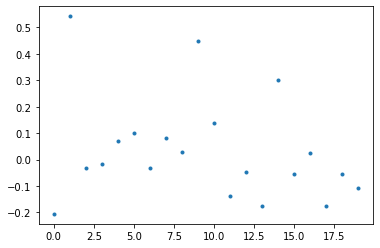

In [21]:
plt.plot(model.coef_[0], '.');

# Logistic regression with l1 penalty 
Hint change solver to "saga"

In [24]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

In [25]:
model_l1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [26]:
roc_auc_score(y_test, model_l1.predict(X_test))

0.775

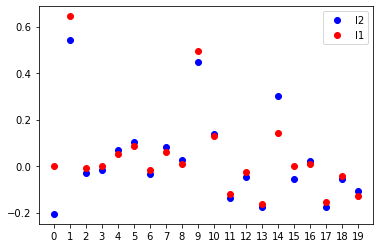

In [30]:
plt.plot(model.coef_[0], 'ob', label='l2');
plt.plot(model_l1.coef_[0], 'or', label='l1');
plt.xticks(np.arange(0, 20));
plt.legend()


# Create a pipeline

In [33]:
print(X.mean())
print(X.std())

0.04847776213790114
1.229791536909913


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [37]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [39]:
roc_auc_score(y_test, pipeline.predict(X_test))

0.7374999999999999

# Cross-validation 

In [40]:
from sklearn.model_selection import (StratifiedShuffleSplit,
                                     cross_val_score)

In [41]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, 
                            random_state=234326)

In [42]:
cv.split(X, y)

<generator object BaseShuffleSplit.split at 0x7fc59848ae40>

In [43]:
for train_idx, test_idx in cv.split(X, y):
    print(test_idx)

[159 180 349 207  78 255 360 185  68  99 376 276 383  14 377 247 186 176
 302 143 326 111 273 244 187 217 223 157 220  36 112 337 292 115  44   9
 395 142  46 336  62 355 338  86 163  21 234 329  27 301  79 121 316 354
 118 215 282  56  65  87 260 264 259 193 284 167  45 178 339 235  32  75
 184 278 241 219  66 212 173  88]
[ 66 273  67 120  65 171 364 173 136 180  17 329 109 325 378 215 277   4
 387  53 107 235  70  98 342 244 124 212  88 279 176  31 149 175 161 200
 311 145  40 344 326 355  59 207 111  58 233 178  42 147 257 196 294 123
  92 174 143 126  76 236  90 157 260 289 208  75 163 160 339 332 221 177
 276 117  26  27 142 104 259  29]
[321  35 182  46  66 216 142 193 112 102  57 302  83 253 174  29 143 275
 329  72 206 368 158 130 243 291 255  26 233  96 355 177 160 176  91  20
 384 148  79  47 196 373  16  58 332  98  92 240  54 188 167 388  73 294
  90 292  87  94 280 378 159 385 203 277 330 251 310 351 139 226 145  89
 126 320 265 210 390 323  97  84]
[ 61 155 398 270 135  

In [44]:
scores = cross_val_score(pipeline, X, y, cv=cv, scoring="roc_auc")

In [45]:
scores

array([0.801875, 0.754375, 0.698125, 0.7925  , 0.74875 ])

In [46]:
scores.mean()

0.7591249999999999

In [47]:
scores.std()

0.03685825891167406

In [48]:
stdscl = StandardScaler()

In [49]:
stdscl.fit(X)

StandardScaler()

In [50]:
stdscl.scale_

array([1.69331248, 1.48752599, 0.95044558, 0.93687538, 0.96746324,
       0.99522461, 0.97867092, 0.97119308, 0.9031551 , 1.60275499,
       1.03067526, 0.98991225, 0.91576177, 1.00574026, 1.548512  ,
       1.88469943, 1.05514967, 0.96435324, 1.00411708, 1.28750254])

In [51]:
stdscl.mean_

array([-0.04529135, -0.54250006,  0.04172557, -0.0475451 , -0.10604623,
        0.04313583,  0.06551255, -0.03673796, -0.02657711,  0.54552966,
        0.02521984,  0.04041969,  0.04325657, -0.02899043,  0.10541518,
        0.99634323, -0.03549314,  0.02731322,  0.08906314, -0.18419789])

In [57]:
pipeline.predict_proba(X_test[:10])

array([[0.44520386, 0.55479614],
       [0.33062123, 0.66937877],
       [0.44761688, 0.55238312],
       [0.33460162, 0.66539838],
       [0.55616509, 0.44383491],
       [0.68384969, 0.31615031],
       [0.62594683, 0.37405317],
       [0.35375108, 0.64624892],
       [0.23859072, 0.76140928],
       [0.12613637, 0.87386363]])

# Plot a roc curve?

In [65]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, confusion_matrix

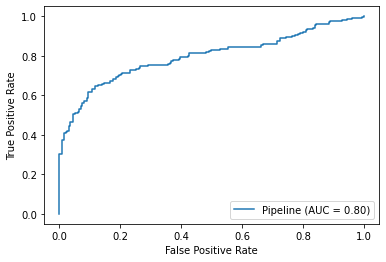

In [60]:
plot_roc_curve(pipeline, X, y)

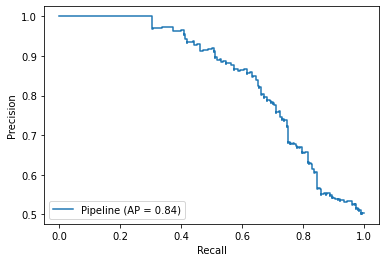

In [61]:
plot_precision_recall_curve(pipeline, X, y)

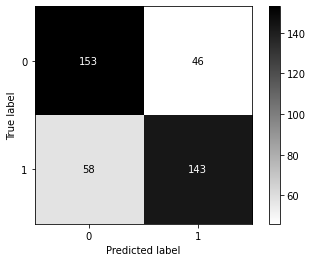

In [64]:
plot_confusion_matrix(pipeline, X, y, cmap='binary')

In [67]:
confusion_matrix(y_test, pipeline.predict(X_test))

array([[28, 12],
       [ 9, 31]])

# Ridge and Lasso

Repeat the pipeline from above using a Ridge regression on data generated below. 

QUESTION: What is difference between Ridge and RidgeCV?

In [104]:
X, y, w = make_regression(
    n_samples=200, n_features=10, coef=True, random_state=5255, bias=3.5
)

# w is the wight that the data generating model is build on, i.e. the ground truth

In [142]:
y

array([  76.94315458, -143.95740236,   14.55656083, -307.50610571,
        -17.26617117, -136.94083572,  -94.73384708,   90.83928015,
        111.36963035, -191.95084939,   76.71406338,  172.49444817,
        152.97888735,  107.20148079, -206.80081831,  244.10433028,
        114.03040016,  -21.28139631,  443.40667329,  105.40134443,
        -47.33682052,    9.69022621,  -50.95590968,   61.1504773 ,
        119.91582178,  112.7193944 ,  -66.84448955,    3.9175474 ,
       -109.46604633,   41.55437755,  -89.27626047, -275.21736493,
         14.83085896, -182.48126095,  137.29331797,   -2.29178376,
        113.78640088,   79.79796019,  101.92980046,  439.33406119,
        146.21848579, -280.41372902,  -15.42208979,  193.47663951,
         24.9699717 , -189.03310065,   71.34279561,  -48.32632975,
        116.41261537, -284.69570616, -225.27586074,  126.75753864,
        171.93351971,  370.59341192, -182.28851055,  573.35137104,
         -2.52017853,  371.79806413, -316.39084418,  -46.99459

In [114]:
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error

In [132]:
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=456)

In [134]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [147]:
ridge_pipeline.named_steps['ridge'].coef_

array([100.94543718,  49.66410964,  64.76144617,  69.85043691,
        24.74008178,  27.49938382,  23.88906916,  64.85750593,
       101.61477608,  85.82346506])

In [136]:
w

array([98.8291441 , 46.4276265 , 68.19611763, 68.15165026, 26.85804853,
       28.31476062, 24.32733533, 64.33254665, 99.28400279, 93.54902659])

In [148]:
mse = mean_squared_error(y_test, ridge_pipeline.predict(X_test))

In [149]:
mse

2.5172471856643432

In [145]:
y_test.mean()

15.391032946647318

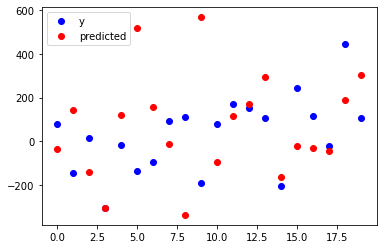

In [141]:
plt.plot(y[:20], 'bo', label='y')
plt.plot(ridge_model.predict(X_test[:20]), 'ro', label='predicted')
plt.legend()